In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Linear Model

# Dataset
**Boston Housing Dataset**
Attributes:

- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per \$10,000.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: \% lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000's.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


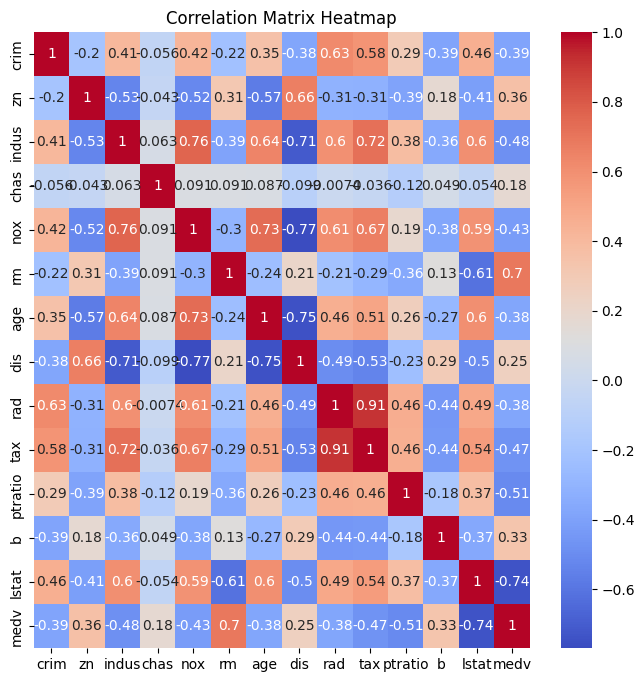

In [3]:
corr_mat = df.corr()
fig = plt.figure(figsize=(8,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [4]:
correlations = sorted(corr_mat["medv"].items(),key=lambda x: -abs(x[1]))[1:]
correlations

[('lstat', -0.7376627261740145),
 ('rm', 0.6953599470715401),
 ('ptratio', -0.5077866855375623),
 ('indus', -0.48372516002837274),
 ('tax', -0.4685359335677667),
 ('nox', -0.42732077237328203),
 ('crim', -0.38830460858681154),
 ('rad', -0.38162623063977735),
 ('age', -0.3769545650045961),
 ('zn', 0.3604453424505433),
 ('b', 0.3334608196570662),
 ('dis', 0.249928734085904),
 ('chas', 0.17526017719029868)]

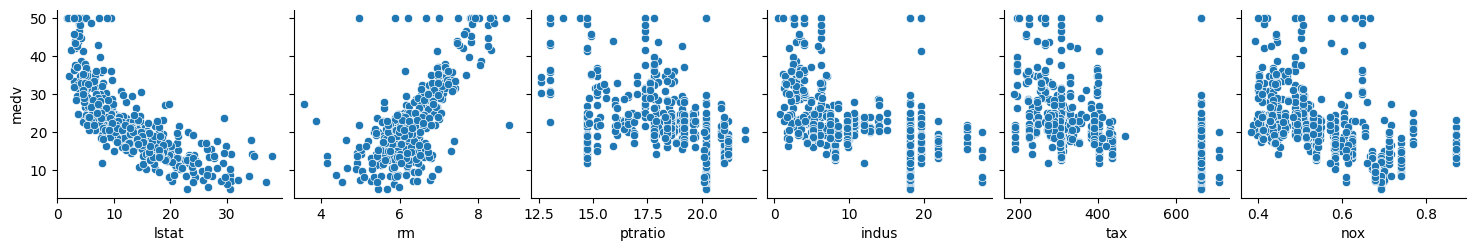

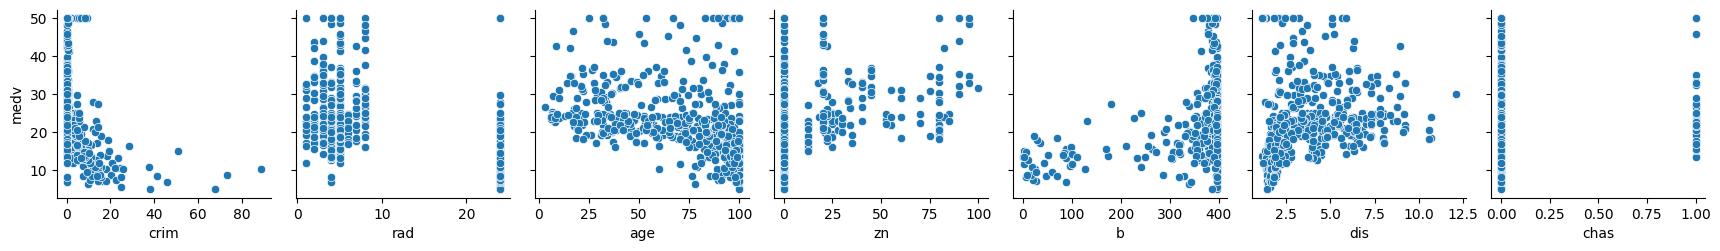

In [5]:
attr_order = [attr for attr, _ in correlations]
sns.pairplot(df, x_vars=attr_order[:6], y_vars=['medv'])
sns.pairplot(df, x_vars=attr_order[6:], y_vars=['medv'])
plt.show()

# Train Test Split

In [6]:
X = df.drop(columns=["medv"])
y = df["medv"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

In [7]:
train_data = pd.concat([X_train, y_train], axis=1)

# Building The Model

In [8]:
dvar_sum = ' + '.join(X.columns)
formula = "medv ~ " + dvar_sum
formula

'medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat'

In [9]:
model = smf.ols(formula=formula, data=train_data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     91.28
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.58e-109
Time:                        14:41:35   Log-Likelihood:                -1194.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5182      5.655      6.812      0.000      27.400      49.636
crim          -0.1283      0.047     -2.711      0.007      -0.221      -0.035
zn             0.0566      0.015      3.745      0.000       0.027       0.086
indus          0.0575      0.068      0.845      0.399      -0.076       0.191
chas           3.2134      0.925      3.476      0.001       1.396       5.031
nox          -19.1930      4.250     -4.516      0.000     -27.549     -10.837
rm             3.5648      0.454      7.855      0.000       2.673       4.457
age            0.0045      0.015      0.298      0.766      -0.025       0.034
dis           -1.5464      0.222     -6.981      0.000      -1.982      -1.111
rad            0.3191      0.075      4.250      0.000       0.171       0.467
tax           -0.0128      0.004     -3.175      0.002      -0.021      -0.005
ptratio       -0.9680      0.147     -6.593      0.000      -1.257      -0.679
b              0.0103      0.003      3.569      0.000       0.005       0.016
lstat         -0.5455      0.055     -9.945      0.000      -0.653      -0.438
==============================================================================
Omnibus:                      126.782   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.042
Skew:                           1.393   Prob(JB):                     1.03e-96
Kurtosis:                       7.301   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Validating

In [11]:
preds = model.predict(X_test)

### MSE and $R^2$ Score

In [12]:
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("MSE",mse)
print("R^2",r2)

MSE 23.428385859182512
R^2 0.6747386028052123


### Regression Hyperplane

In [15]:
import numpy as np


x1_grid, x2_grid = np.meshgrid(np.linspace(min(X["crim"]), max(X["crim"]), 10), np.linspace(min(X["zn"]), max(X["zn"]), 10))
x3_grid, x4_grid = np.meshgrid(np.linspace(min(X["indus"]), max(X["indus"]), 10), np.linspace(min(X["chas"]), max(X["chas"]), 10))
x5_grid, x6_grid = np.meshgrid(np.linspace(min(X["nox"]), max(X["nox"]), 10), np.linspace(min(X["rm"]), max(X["rm"]), 10))
x7_grid, x8_grid = np.meshgrid(np.linspace(min(X["age"]), max(X["age"]), 10), np.linspace(min(X["dis"]), max(X["dis"]), 10))
x9_grid, x10_grid = np.meshgrid(np.linspace(min(X["rad"]), max(X["rad"]), 10), np.linspace(min(X["tax"]), max(X["tax"]), 10))
x11_grid, x12_grid = np.meshgrid(np.linspace(min(X["ptratio"]), max(X["ptratio"]), 10), np.linspace(min(X["b"]), max(X["b"]), 10))
x13_grid,_ = np.meshgrid(np.linspace(min(X["lstat"]), max(X["lstat"]), 10),np.linspace(0, 1, 10))

X_grid = pd.DataFrame(data=np.column_stack((x1_grid.ravel(), x2_grid.ravel(), x3_grid.ravel(), x4_grid.ravel(), x5_grid.ravel(), x6_grid.ravel(), x7_grid.ravel(), x8_grid.ravel(), x9_grid.ravel(), x10_grid.ravel(), x11_grid.ravel(), x12_grid.ravel(), x13_grid.ravel())), columns=X.columns)

y_pred = model.predict(X_grid).to_numpy()

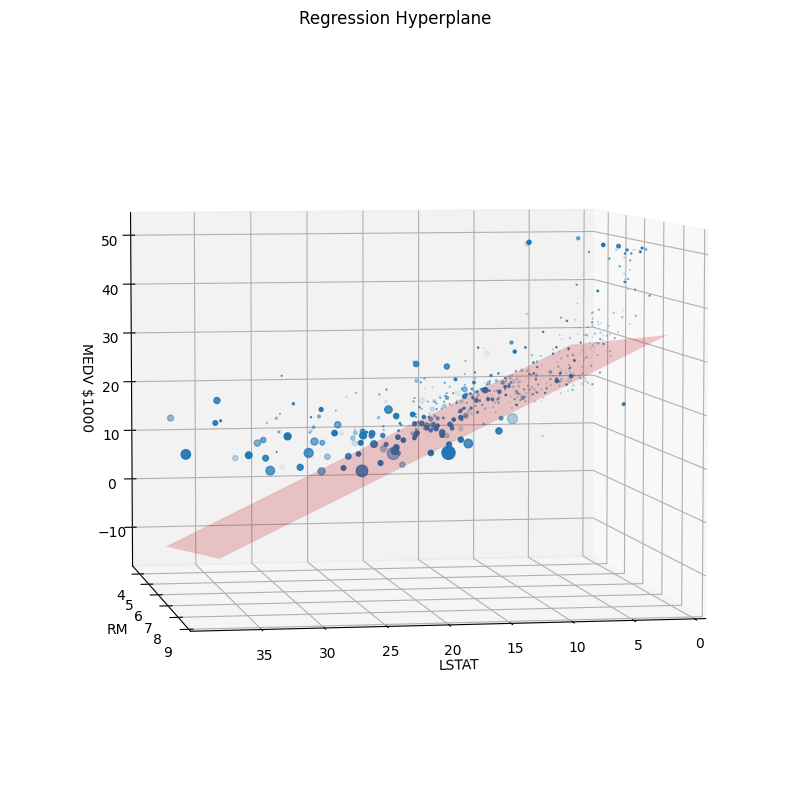

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["lstat"], df["rm"], df["medv"],alpha=df["age"]/100,s=df["crim"])
ax.plot_surface(x13_grid, x6_grid,  y_pred.reshape(x1_grid.shape), alpha=0.2, color='red')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV $1000')
ax.set_title('Regression Hyperplane')
ax.view_init(elev=5, azim=80)
plt.show()


### Residual Plot 

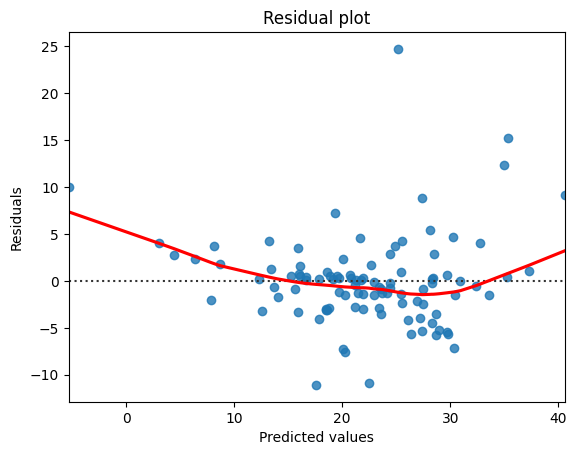

In [17]:
sns.residplot(x=preds, y=y_test - preds, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()